In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.impute import SimpleImputer

# Reading Data

In [2]:
df1 = pd.read_csv('../static/googleplaystore/googleplaystore.csv')
df2 = pd.read_csv('../static/googleplaystore/googleplaystore_user_reviews.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Null Values

In [5]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Initializing Imputer to change Null Values

In [6]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [7]:
imputer.fit(df1.iloc[:, 2:3].values)
df1.iloc[:, 2:3] = imputer.transform(df1.iloc[:, 2:3].values)

In [8]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

# Dropping Null Values

In [9]:
df1 = df1.dropna()

In [10]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Creating Functions to preprocess the data

In [12]:
def price_optimizer(x):
    if x == '0':
        return 0.0
    return float(x.split('$')[1])

In [13]:
def Installs_optimizer(x):
    return int(''.join(x[:-1].split(',')))

In [14]:
def Reviews_optimizer(x):
    return int(x)

In [15]:
df1['Price'] = df1['Price'].apply(price_optimizer)

In [16]:
df1['Installs'] = df1['Installs'].apply(Installs_optimizer)

In [17]:
df1['Reviews'] = df1['Reviews'].apply(Reviews_optimizer)

In [18]:
df1.describe()

,Rating,Reviews,Installs,Price
count,10829.000000,1.082900e+04,1.082900e+04,10829.000000
mean,4.192041,4.446018e+05,1.547990e+07,1.028091
std,0.479038,2.929213e+06,8.507114e+07,15.957778
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,5.000000e+03,0.000000
50%,4.200000,2.100000e+03,1.000000e+05,0.000000
75%,4.500000,5.481500e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


# Checking all unique values

In [20]:
df1.nunique()

App               9648
Category            33
Rating              40
Reviews           5999
Size               457
Installs            20
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1376
Current Ver       2831
Android Ver         33
dtype: int64

# Analyzing Content Rating And Rating

<AxesSubplot:xlabel='Content Rating'>

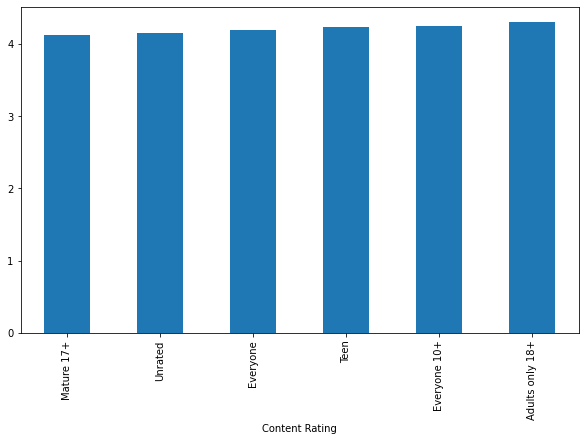

In [21]:
df1.groupby('Content Rating')['Rating'].mean().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

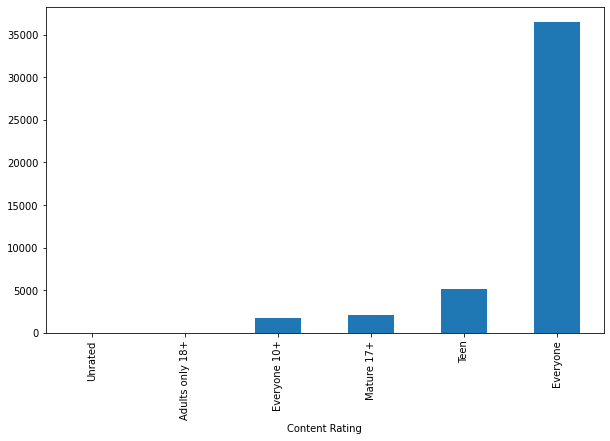

In [22]:
df1.groupby('Content Rating')['Rating'].sum().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

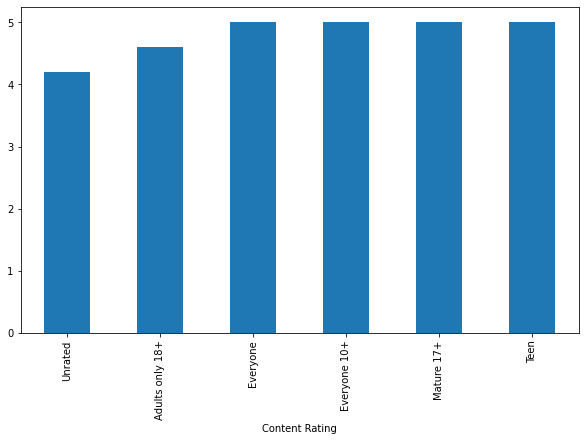

In [23]:
df1.groupby('Content Rating')['Rating'].max().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

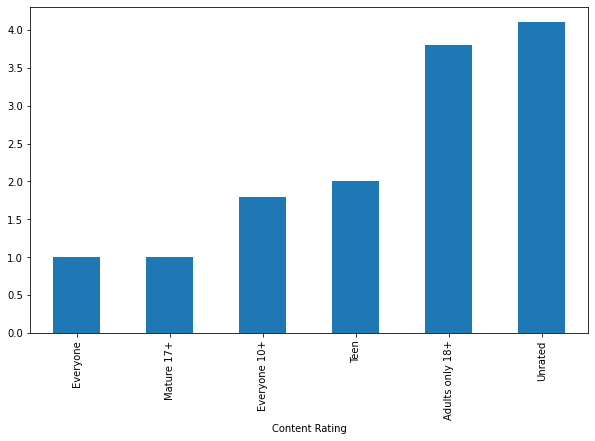

In [24]:
df1.groupby('Content Rating')['Rating'].min().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

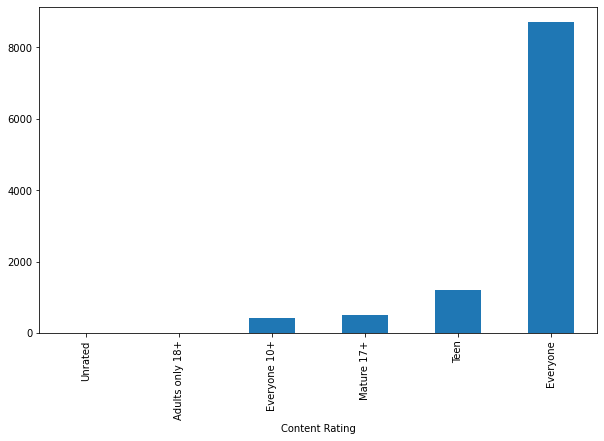

In [25]:
df1.groupby('Content Rating')['Rating'].count().sort_values().plot.bar(figsize = (10, 6))

In [26]:
content_rating_type = df1.groupby(['Content Rating', 'Type'])['Rating'].mean()
content_rating_type

Content Rating   Type
Adults only 18+  Free    4.300000
Everyone         Free    4.183469
                 Paid    4.234038
Everyone 10+     Free    4.248667
                 Paid    4.324242
Mature 17+       Free    4.117885
                 Paid    4.389001
Teen             Free    4.221471
                 Paid    4.404872
Unrated          Free    4.146669
Name: Rating, dtype: float64

In [27]:
content_rating_type = content_rating_type.reset_index()
content_rating_type

,Content Rating,Type,Rating
0,Adults only 18+,Free,4.300000
1,Everyone,Free,4.183469
2,Everyone,Paid,4.234038
3,Everyone 10+,Free,4.248667
4,Everyone 10+,Paid,4.324242
5,Mature 17+,Free,4.117885
6,Mature 17+,Paid,4.389001
7,Teen,Free,4.221471
8,Teen,Paid,4.404872
9,Unrated,Free,4.146669


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

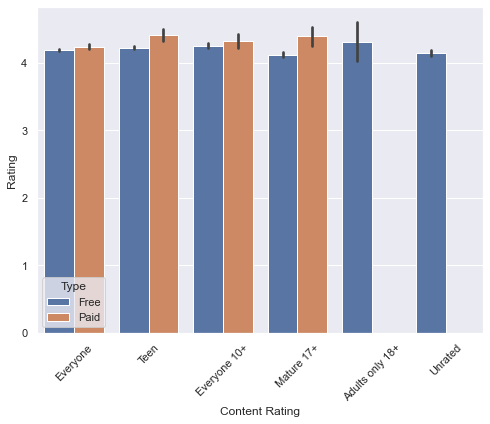

In [28]:
sns.set(rc = {'figure.figsize' : (8, 6)})
sns.barplot(x = 'Content Rating', y = 'Rating', hue = 'Type', estimator = np.mean, data = df1)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

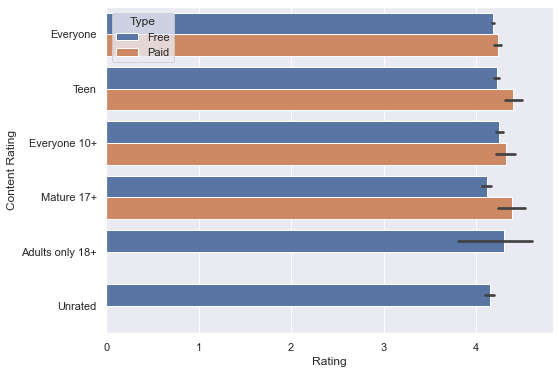

In [29]:

sns.barplot(x = 'Rating', y = 'Content Rating', hue = 'Type', estimator = np.mean, data = df1)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

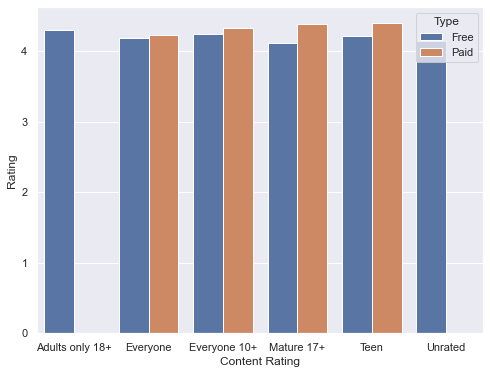

In [30]:
sns.barplot(data = content_rating_type, x = 'Content Rating', y = 'Rating', hue = 'Type')

# Analyzing Content Rating and Price

<AxesSubplot:xlabel='Content Rating'>

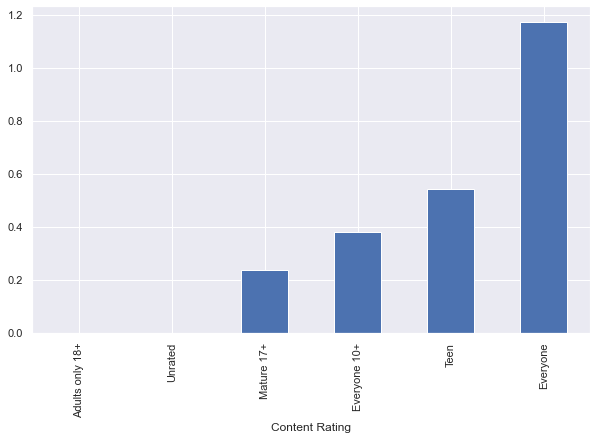

In [31]:
df1.groupby('Content Rating')['Price'].mean().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

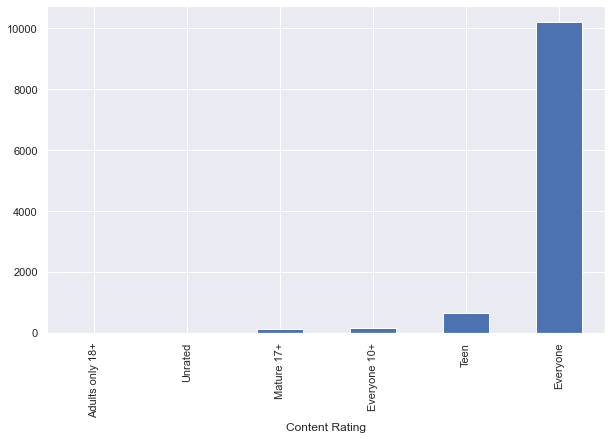

In [32]:
df1.groupby('Content Rating')['Price'].sum().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

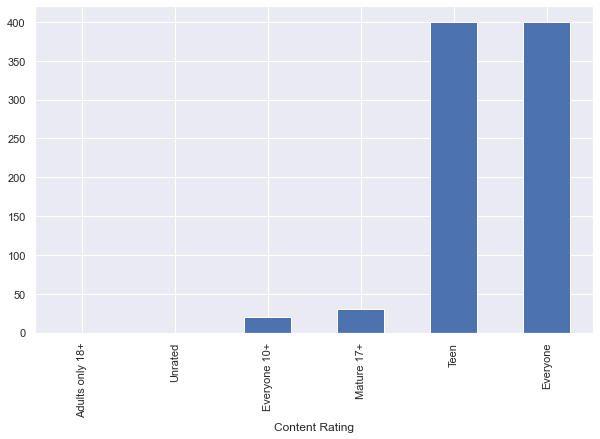

In [33]:
df1.groupby('Content Rating')['Price'].max().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

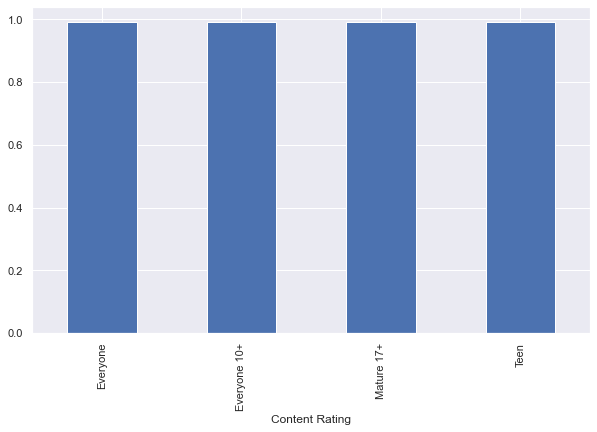

In [34]:
df1.where(df1['Type'] == 'Paid', inplace = False).groupby('Content Rating')['Price'].min().sort_values().plot.bar(figsize = (10, 6))

# Types of App

<AxesSubplot:ylabel='App'>

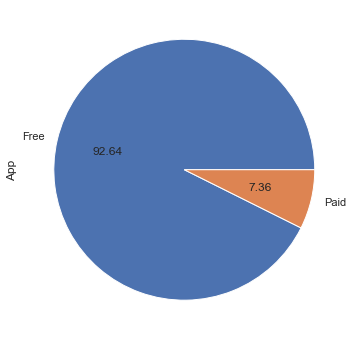

In [35]:
df1.groupby('Type')['App'].count().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot:ylabel='App'>

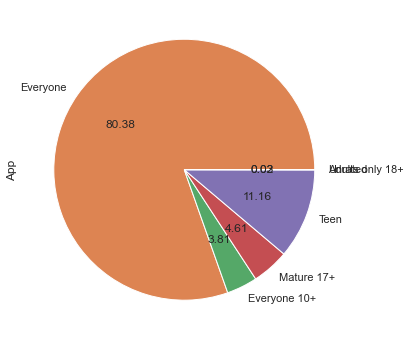

In [36]:
df1.groupby('Content Rating')['App'].count().plot(kind = 'pie', autopct = '%.2f')

# Analyzing Content Rating and Installs

<AxesSubplot:xlabel='Content Rating'>

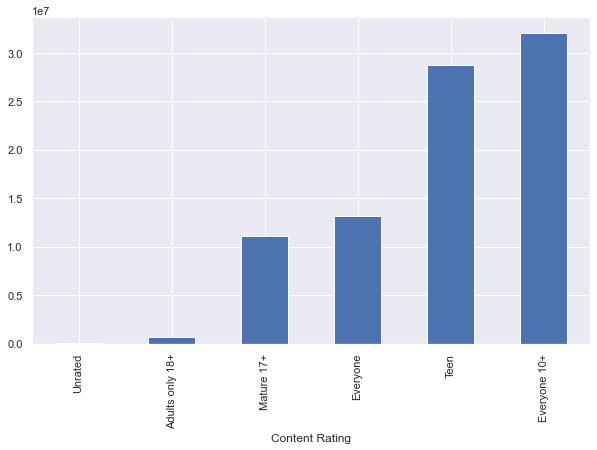

In [37]:
df1.groupby('Content Rating')['Installs'].mean().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:ylabel='Installs'>

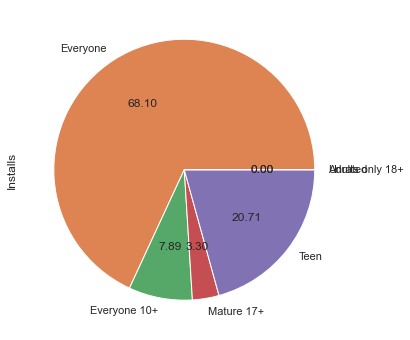

In [38]:
df1.groupby('Content Rating')['Installs'].sum().plot(kind = 'pie', autopct = '%.2f')

<AxesSubplot:xlabel='Content Rating'>

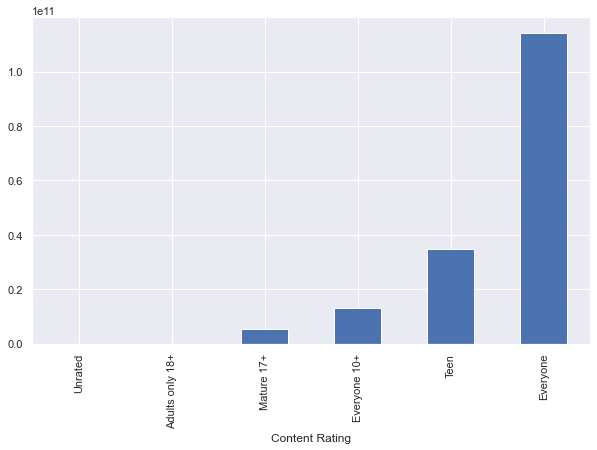

In [39]:
df1.groupby('Content Rating')['Installs'].sum().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

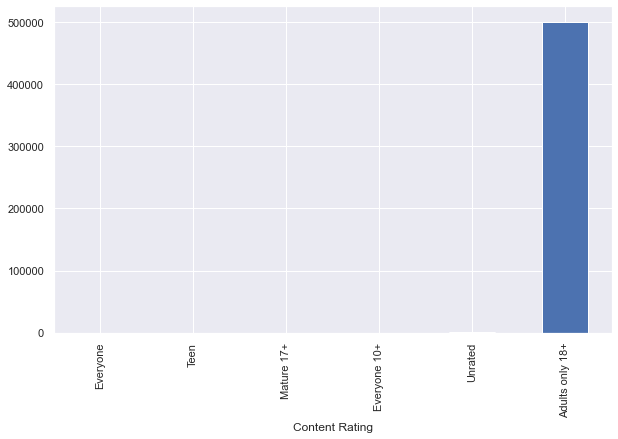

In [40]:
df1.groupby('Content Rating')['Installs'].min().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

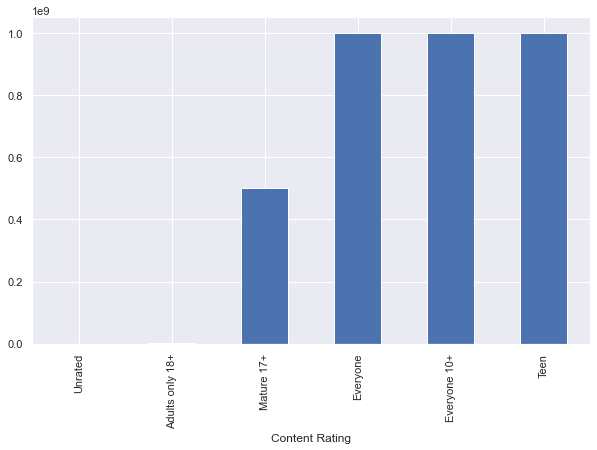

In [41]:
df1.groupby('Content Rating')['Installs'].max().sort_values().plot.bar(figsize = (10, 6))

# Analyzing Reviews and Content Rating

<AxesSubplot:xlabel='Content Rating'>

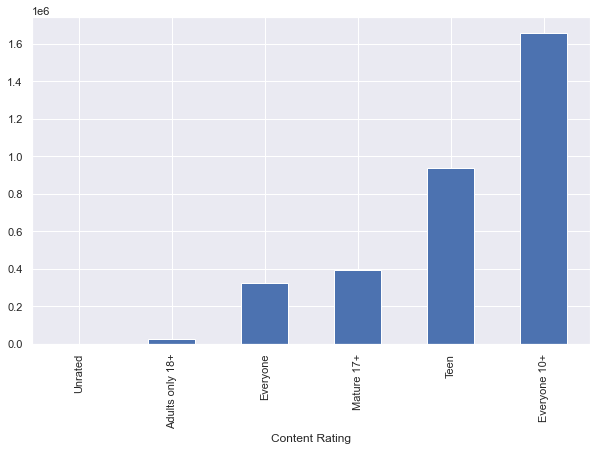

In [42]:
df1.groupby('Content Rating')['Reviews'].mean().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

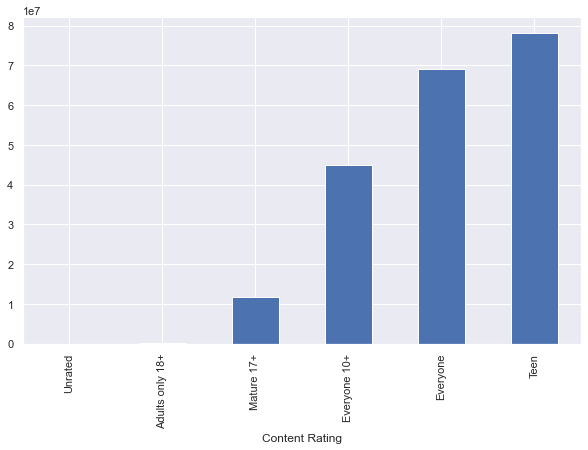

In [43]:
df1.groupby('Content Rating')['Reviews'].max().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

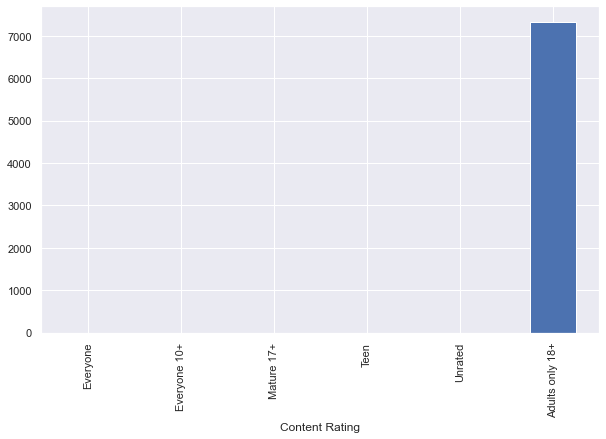

In [44]:
df1.groupby('Content Rating')['Reviews'].min().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:xlabel='Content Rating'>

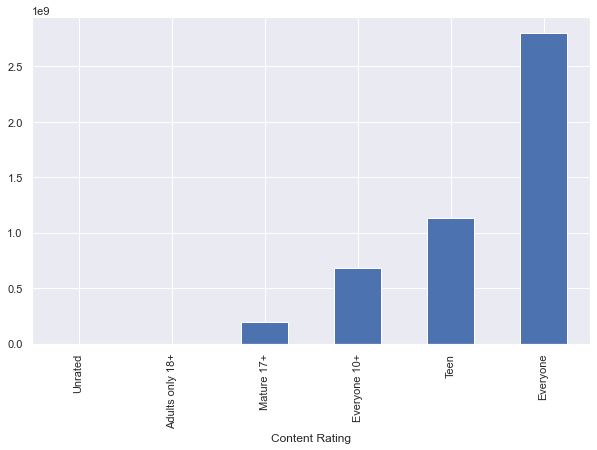

In [45]:
df1.groupby('Content Rating')['Reviews'].sum().sort_values().plot.bar(figsize = (10, 6))

<AxesSubplot:ylabel='Reviews'>

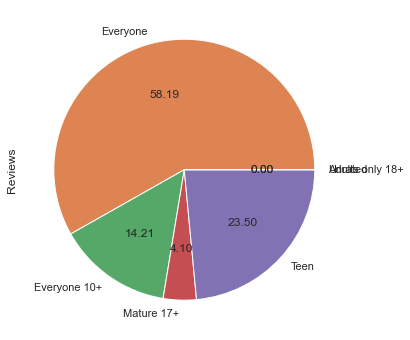

In [46]:
df1.groupby('Content Rating')['Reviews'].sum().plot(kind = 'pie', autopct = '%.2f')

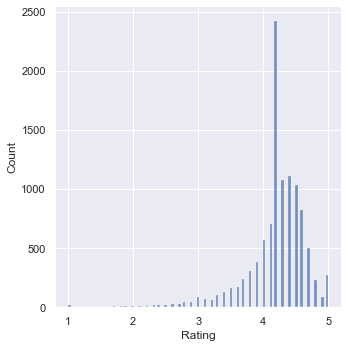

In [47]:
sns.displot(df1['Rating'])